# Perceptron Implementation

The original perceptron model  aim to solve binary classification. It consists on finding an hyperplane of equation $w^T x+b=0$ which separates linearly separable datas

The Perceptron model gives the class  by computing $\hat{y}= sign(w^T x + b)$ where $\{w,b\}$ are the parameters of the model.


---






Learning procedure:


*   start with t=1 , wt=0 and $(x_i,y_i)^n$ the samples $y_i \in \{-1,1\}$
*  while the model makes mistake (fix with a number of iterations)
      * for i in range(1,n):
         * predict $\hat{y_i}== sign(w^T x)$
         * if $y_i!=\hat{y_i}$ do $ w_{t+1}=w_{t} + sign(y_i) x$

ps: the bias b is included in $w$

---

Here are some courses explaining in detail  the Perceptron model : https://www.youtube.com/watch?v=C8Uns9HEVXI , https://courses.grainger.illinois.edu/cs440/fa2019/Lectures/lect26.html

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron


In [108]:
# Perceptron

class MyPerceptron:
    def __init__(self):
        self.errors = []

    def add_bias(self,X):
        return np.insert(X,0, 1,axis=1)

    def fit(self,X,y, nb_iters=30):
        """
        X array of shape (nb_samples, dim_samples) training data
        y (nb_samples,) target values
        """
        X=self.add_bias(X)
        nb_samples, dim_samples=X.shape
        y= np.array([1 if value == 1 else -1 for value in y])
        self.w=np.zeros(dim_samples)
        prediction=X@self.w
        prediction=np.array([1 if value >= 0 else -1 for value in prediction])
        self.errors.append(np.sum(y!=prediction))
        for _ in range(nb_iters):
            for i in range(nb_samples):
                if(prediction[i]!=y[i]):
                    self.w=self.w+y[i]*X[i,:]
            prediction=(X@self.w)
            prediction=np.array([1 if value >= 0 else -1 for value in prediction])
            self.errors.append(np.sum(y!=prediction))
        return



    def predict(self, X):
        """
        X array of shape (nb_samples, dim_samples)
        """
        prediction=X@self.w
        return np.array([1 if value >= 0 else -1 for value in prediction])

    def plot_errors(self):
        """
        Plot the errors during fitting
        """
        plt.plot(self.errors)
        plt.xlabel("Iterations")
        plt.ylabel("Errors")
        plt.show()

    def score(self,X, y):
        """
        X array of shape (nb_samples, dim_samples)
        y (nb_samples,) target values
        Returns the mean accuracy on the given test data and labels.
         """
        X=self.add_bias(X)
        y= np.array([1 if value == 1 else -1 for value in y])
        prediction=X@self.w
        prediction=np.array([1 if value >= 0 else -1 for value in prediction])
        return np.mean(y==prediction)

    def plot_hyperplane(self, X, y):
        """
        Plots the dataset and the estimated decision hyperplane
        X array of shape (nb_samples, dim_samples) with dim_samples=2
        y (nb_samples,) target values
        """
        #X=self.add_bias(X)
        hyperplane_slope=-self.w[1]/self.w[2]
        hyperplane_intercept=-self.w[0]/self.w[2]
        plt.figure()
        plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.Paired)
        x_hyperplane = np.linspace(-7,7,10)
        y_hyperplane = hyperplane_slope * x_hyperplane + hyperplane_intercept
        plt.plot(x_hyperplane, y_hyperplane, '-')
        plt.title("decision hyperplane")
        plt.xlabel("First feature")
        plt.ylabel("Second feature")
        plt.show()




he accuracy is 0.997


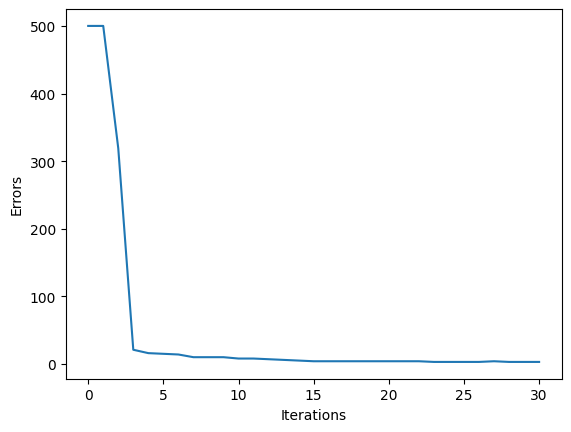

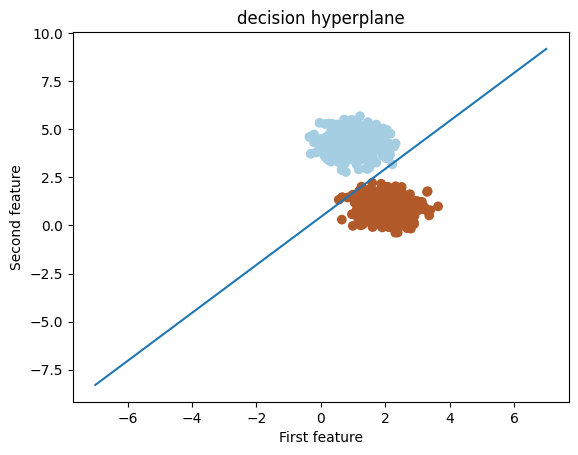

In [109]:
#TEST with blobs
X, y = make_blobs(n_samples=1000, centers=2,cluster_std=0.5, n_features=2,random_state=0)
myclf = MyPerceptron()
myclf.fit(X, y)
print("The accuracy is",myclf.score(X, y))
myclf.plot_errors()
myclf.plot_hyperplane(X, y)

In [112]:
# Test with sklearn implementation
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print("The accuracy with sklearn implementation is",clf.score(X, y))


The accuracy with sklearn implementation is 1.0


The accuracy is 0.9838619922092376


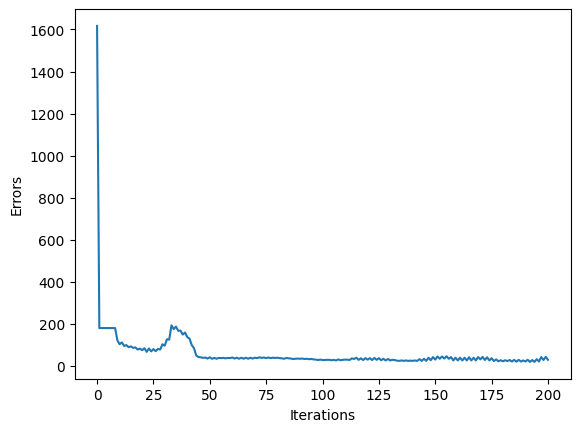

In [129]:
# Test with my implementation
# prediction of the digit 9
X, y = load_digits(return_X_y=True)
y=(y==9)*1
myclf = MyPerceptron()
myclf.fit(X, y,nb_iters=200)
print("The accuracy is",myclf.score(X, y))
myclf.plot_errors()



In [130]:
# Test with sklearn implementation
# prediction of the digit 9

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
print("The accuracy with sklearn implementation is",clf.score(X, y))


The accuracy with sklearn implementation is 0.9888703394546466
